# Introduction

Image classification is the task of assigning a label or a category to an image. Image classification plays an important role in real-world applications such as agriculture, land use/land planning, urban planning, surveillance, geographic mapping, disaster control, and object detection. Specifcally, object detection has been a central part of autonomus driving technology. 

In this notebook, we will use a dataset from fashion industry. This dataset is provided by Zalando and is publically available at: [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist). It is a worthwhile alternative to MINST digit datset.

# Data

First, we will load this dataset using keras API. This dataset contains 70,000 greyscale images at low resolution (28 by 28 pixels). Here, 60,000 images are used for training purpose and the remaining 10,000 images are used to evalaute the performance of a trained model. 

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print()
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)

Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


Let's load an image from this dataset. It can be seen that this image has pixel values in the range of 0 to 255.

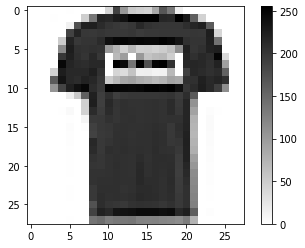

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[1], cmap=plt.cm.gist_yarg)
plt.colorbar()
plt.grid(False)
plt.show()

Next, we will identify labels present in the dataset. This dataset contains 10 unique labels from 0 to 9. 

In [3]:
import numpy as np
labellist = np.unique(y_train)
print('Labels: ', labellist)

Labels:  [0 1 2 3 4 5 6 7 8 9]


If we plot a random image correspoding to each of those 10 labels, we will see what these labels actually mean.

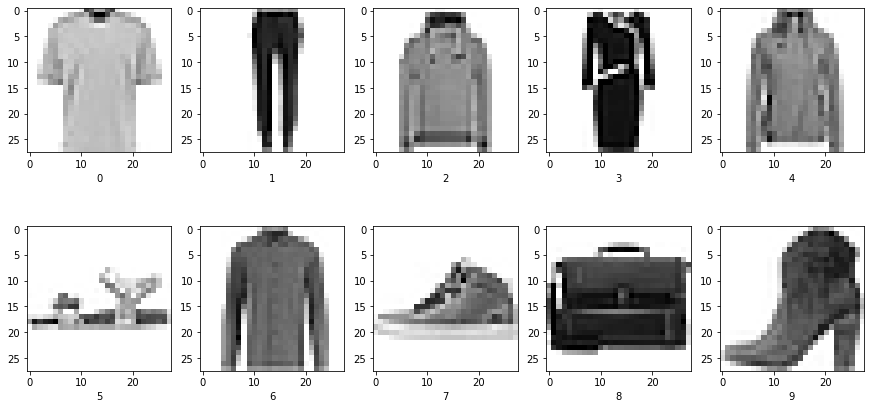

In [4]:
figure, axes = plt.subplots(2, 5, figsize=(15,8))
plt.subplots_adjust(hspace = 0.01, wspace=0.20)
i=0

for item in labellist:
    a = int(np.floor(i/5))
    b = i%5
    indices = np.nonzero(y_train == item)
    axes[a][b].imshow(x_train[indices[0][-1]], cmap=plt.cm.gist_yarg)
    axes[a][b].set_xlabel(item)
    i=i+1
plt.show()

It is now clear that these labels correspond to the class of clothing the image represents.

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Each image is mapped to a single label, we will use the class names for plotting purposes.

In [5]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(labelNames)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Next, we will visualize the range of clothings present in the dataset and associated diversity within a single label.

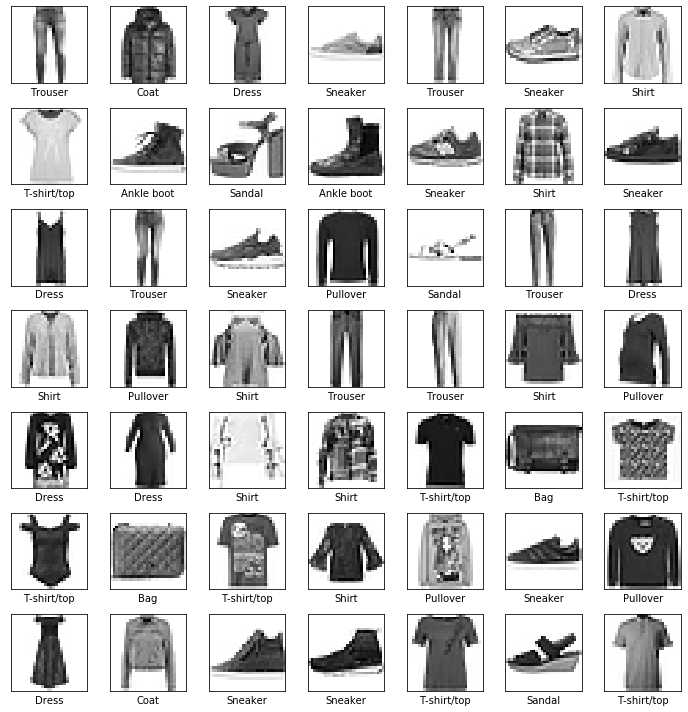

In [6]:
import random

ROW = 7
COLUMN = 7
plt.figure(figsize=(10, 10)) 
for i in range(ROW * COLUMN):
    temp = random.randint(1, len(x_train)+1)
    image = x_train[temp] 
    plt.subplot(ROW, COLUMN, i+1)       
    plt.imshow(image, cmap=plt.cm.gist_yarg)  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labelNames[y_train[temp]])
    plt.tight_layout()   
    
plt.show()

Next, we will check the class distribution or the frequency of labels present in the dataset. It seems that dataset is *balanced* as it has equal distribution for all ten classes.

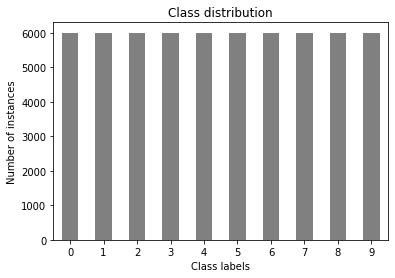

In [7]:
import pandas as pd
df = pd.DataFrame(y_train)
ax = df[0].value_counts().sort_index().plot(kind='bar', color='gray', rot=0)
ax.set_xlabel('Class labels')
ax.set_ylabel('Number of instances')
plt.title('Class distribution');

# Experiments

We will build two neural networks for this task: fully-connected and convolutional.

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# # fix seed
# seed = 1
# tf.random.set_seed(seed)
# np.random.seed(seed)

## Fully-connected neural network

The basic buidling block of a neural network is the *layer*. We stack several layers together to learn meaningful insights about a problem at hand. 

Here, we first recale the pixel values to a range of 0 to 1 before feeding them to a neural network. We do this by diving the input image by a value of 255. This image is of size 28 by 28. We first apply the *flatten* layer to transform a 2D image (28 by 28 pixels) to a 1D representation (28\*28 = 784 pixels). These two layers have no parameter to learn since they only transform the data.

After creating a 1D representation of images, we use the first *Dense* layer with 128 neurons. Then, we use the *Dropout* layer to avoid overfitting. It randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value. We use 0.2 which means 20% of the of output units are randomly dropped out from the applied layer. After that, the second *Dense* layer that returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

We train the neural network in batches; therefore, we set the batch size as 64.

In [9]:
num_classes = 10
BATCH_SIZE = 64

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


As can be seen from the model summary, the model needs to learn parameters for the two *dense layers*. 

Because training is easier on the balanced data, the above training procedure may overfit quickly. Therefore, we add an early stopping callback. In this process, the training is stopped if its performance (or validation accuracy) does not improve over 5 consecutive epochs. For validation, we keep aside 20% of the training dataset.

We use Adam algorithm as our optimizer and Sparse Categorical Cross entropy as our loss function.

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=5,
    mode='min',
    restore_best_weights=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

We set a maximum number of epochs as 50 and train the model.

In [12]:
model_FCNN = model.fit(x_train, y_train, epochs=50, validation_split= 0.2, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 0.6033 - accuracy: 0.7882 - val_loss: 0.4435 - val_accuracy: 0.8405
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4401 - accuracy: 0.8427 - val_loss: 0.3904 - val_accuracy: 0.8594
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3995 - accuracy: 0.8561 - val_loss: 0.3691 - val_accuracy: 0.8627
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3757 - accuracy: 0.8641 - val_loss: 0.3601 - val_accuracy: 0.8686
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3586 - accuracy: 0.8701 - val_loss: 0.3431 - val_accuracy: 0.8752
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3455 - accuracy: 0.8721 - val_loss: 0.3346 - val_accuracy: 0.8807
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3335 - accuracy: 0.8769 - val_loss: 0.3515 - val_accuracy: 0.8712
Epoch 

The following plots reveal that there is less overfitting since training and validation losses are closely aligned!

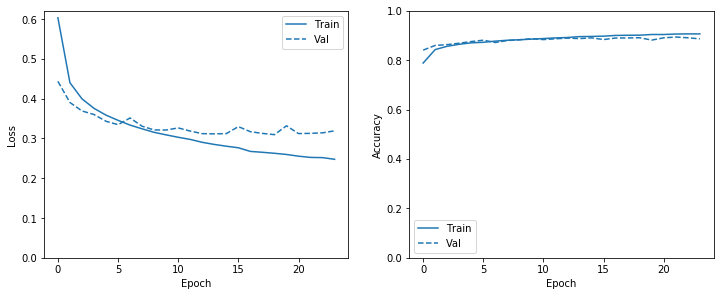

In [13]:
plt.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
    
plot_metrics(model_FCNN)

Finally, the performance of the model is evaluated on the test dataset.

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=2)

print('\nTest accuracy:', test_acc)

157/157 - 0s - loss: 0.3388 - accuracy: 0.8868

Test accuracy: 0.8867999911308289


## Convolutional neural network (CNN)

The convolutional base is defined using a common pattern: a stack of Conv2D and MaxPooling2D layers. In this notebook, we use only 1 Conv2D and 1 Maxpooling 2D layer for illustration purposes. As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. The color_channels refer to (R,G,B). In this example, we only have 1 color channel. The first layer is the *rescaling* layer which keeps the input tensor of shape (28, 28, 1) in a range of 0 to 1. 

As we can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). To complete the model, we will need to feed the last output tensor from the convolutional base (of shape (14, 14, 16)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, we will flatten the 3D output to 1D, then add one or more Dense layers on top along with a dropout layer. Since the dataset has 10 output classes, so we will use a final Dense layer with 10 outputs.

In [15]:
num_classes = 10
BATCH_SIZE = 64

model_CNN = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28, 1)),
  layers.Conv2D(16 ,3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

In [16]:
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

As we can see that the 3D tensor (of shape (14,14,16)) is flattened into a 1D representation (of shape 3136). The parameters that need to be estimated belong to Conv2D and dense layers.

We also add an early stopping callback. In this process, the training is stopped if its performance (or validation accuracy) does not improve over 5 consecutive epochs. For validation, we keep aside 20% of the training dataset.

We use Adam algorithm as our optimizer and Sparse Categorical Cross entropy as our loss function.

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=5,
    mode='min',
    restore_best_weights=True)

model_CNN.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
CNN_model = model_CNN.fit(x_train, y_train, epochs=50, validation_split= 0.2, batch_size=BATCH_SIZE, callbacks=[early_stopping])

Epoch 1/50
750/750 [==============================] - 17s 22ms/step - loss: 0.5647 - accuracy: 0.8041 - val_loss: 0.3517 - val_accuracy: 0.8722
Epoch 2/50
750/750 [==============================] - 14s 19ms/step - loss: 0.3717 - accuracy: 0.8707 - val_loss: 0.3015 - val_accuracy: 0.8905
Epoch 3/50
750/750 [==============================] - 14s 18ms/step - loss: 0.3254 - accuracy: 0.8844 - val_loss: 0.2817 - val_accuracy: 0.8945
Epoch 4/50
750/750 [==============================] - 13s 18ms/step - loss: 0.2996 - accuracy: 0.8924 - val_loss: 0.2664 - val_accuracy: 0.9018
Epoch 5/50
750/750 [==============================] - 15s 20ms/step - loss: 0.2777 - accuracy: 0.8983 - val_loss: 0.2555 - val_accuracy: 0.9079
Epoch 6/50
750/750 [==============================] - 13s 17ms/step - loss: 0.2617 - accuracy: 0.9054 - val_loss: 0.2524 - val_accuracy: 0.9076
Epoch 7/50
750/750 [==============================] - 16s 22ms/step - loss: 0.2503 - accuracy: 0.9088 - val_loss: 0.2548 - val_accuracy:

The following plots reveal that there is less overfitting since training and validation losses are closely aligned!

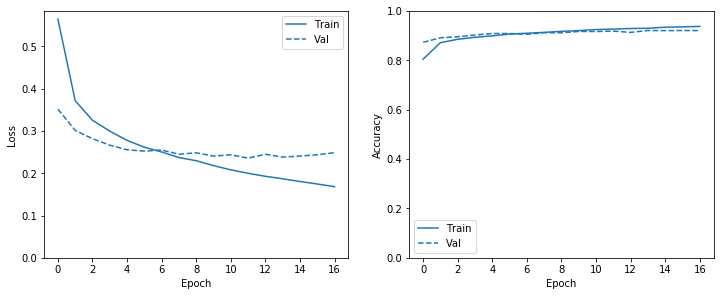

In [19]:
plot_metrics(CNN_model)

Finally, the CNN model is evalauted on a test dataset. Compared to a fully-connected neural network model, the CNN model achieves a better performance.

In [20]:
model_CNN.save('model_CNN.h5')

In [21]:
test_loss, test_acc = model_CNN.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=2)

print('\nTest accuracy:', test_acc)

157/157 - 1s - loss: 0.2538 - accuracy: 0.9089

Test accuracy: 0.9089000225067139


# Performance verification of the CNN model

In this section, we will verify the performance of the CNN model using a confusion matrix. The confusion matrix is widely used to evaluate the performance of a classifier. The diagonal elements represent the number of points for which the predicted label is equal to the true label.

In [22]:
#Load the CNN model
loaded_model = tf.keras.models.load_model('model_CNN.h5')

In [23]:
y_pred=loaded_model.predict(x_test)
y_pred_lbls=np.argmax(y_pred,-1)

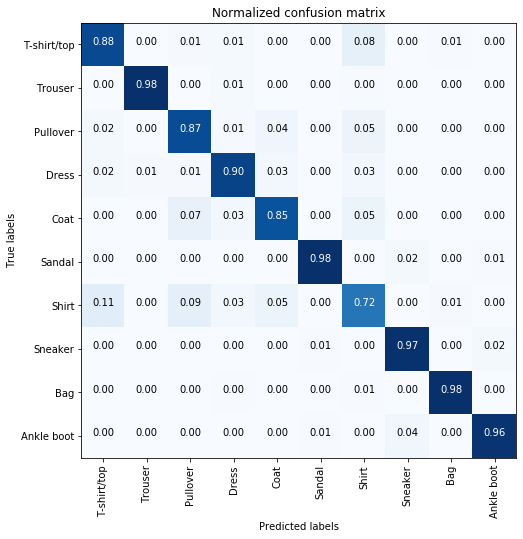

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, class_, title='Normalized confusion matrix', cmap=plt.cm.Blues):
    """
    This function plots a confusion matrix
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()
    
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lbls, normalize='true'), list(labelNames))

The confusion matrix indicates that the CNN model achieves a strong performance in correctly predicting *trousers*, *dress*, *sandal*, *sneaker*, *bag*, and *ankle boot*. Above par performance is achieved for *tshirt/top*, *pullover*, and *coat*. However, the performance diminishes especially on *shirt*. 11% of the images belonging to the *shirt* category are predicted as *t-shirts/tops*. 

Now we randomly look at few shirt samples to see how the CNN model makes predictions about this category.

In [25]:
def plot_image(i, predictions_array, true_label, img, class_names=labelNames):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [26]:
probability_model = tf.keras.Sequential([loaded_model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

Retrieve 10 samples of shirts randomly from the test dataset.

In [35]:
indices = np.nonzero(y_test == 6)
list_of_shirt = np.random.choice(indices[0],10)

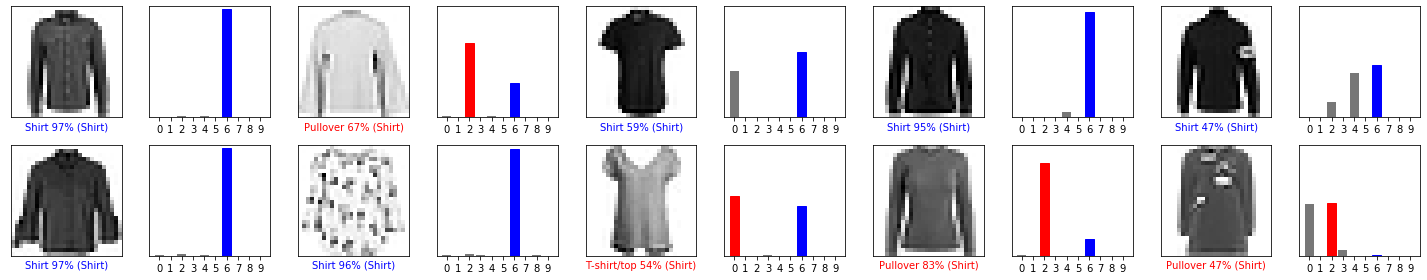

In [36]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
counter = 0
for item in list_of_shirt:
    i= item
    plt.subplot(num_rows, 2*num_cols, 2*counter+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*counter+2)
    plot_value_array(i, predictions[i], y_test)
    counter = counter + 1
plt.tight_layout()
plt.show()

These investigations suggest that the model might wrongly predict the labels of shirts that might look like a t-shirt/top as also suggested by the confusion matrix.

# Conclusions

We have developed a CNN model to classify images on the Fashion-MINST dataset. The model achieves an accuracy of more than 90%. The performance of the model can be further verified for deeper networks. Model hyperparameters can also be optimized for further investigations. In future, it is also important to investigate the approaches that might improve accuracy on few categories with lower accuracies.